In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [44]:
df = pd.read_csv("./data/imdb_movie_reviews/IMDB_Dataset.csv")

In [45]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
print(df.iloc[1][0])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


In [47]:
len(df)

50000

In [48]:
reviews = df['review']

In [54]:
label_words = df['sentiment']

In [55]:
label_words[:10]

0    positive
1    positive
2    positive
3    negative
4    positive
5    positive
6    positive
7    negative
8    negative
9    positive
Name: sentiment, dtype: object

In [56]:
len(label_words)

50000

In [57]:
labels = []

for sentiment in label_words:
    if sentiment == 'positive':
        labels.append(1)
    else:
        labels.append(0)

In [60]:
print(reviews[:10])
print(labels[:10])

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1]


In [65]:
review_filtered = []
for review in reviews:
    review_filtered.append(review.replace('<br />', ''))

In [69]:
print(review_filtered[:1])

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows w

In [79]:
review_filtered_train = review_filtered[:45000]
review_filtered_test = review_filtered[45000:]

labels_train = labels[:45000]
labels_test = labels[45000:]

In [80]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(review_filtered_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(review_filtered_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(review_filtered_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [81]:
training_padded = np.array(training_padded)
training_labels = np.array(labels_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(labels_test)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [83]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

model.add(GlobalAveragePooling1D())

model.add(Dense(24, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [87]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[early_stop])

Epoch 1/30
1407/1407 - 20s - loss: 0.4531 - accuracy: 0.7896 - val_loss: 0.3590 - val_accuracy: 0.8396
Epoch 2/30
1407/1407 - 19s - loss: 0.3132 - accuracy: 0.8672 - val_loss: 0.3624 - val_accuracy: 0.8420
Epoch 3/30
1407/1407 - 19s - loss: 0.2815 - accuracy: 0.8824 - val_loss: 0.3664 - val_accuracy: 0.8402


In [88]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

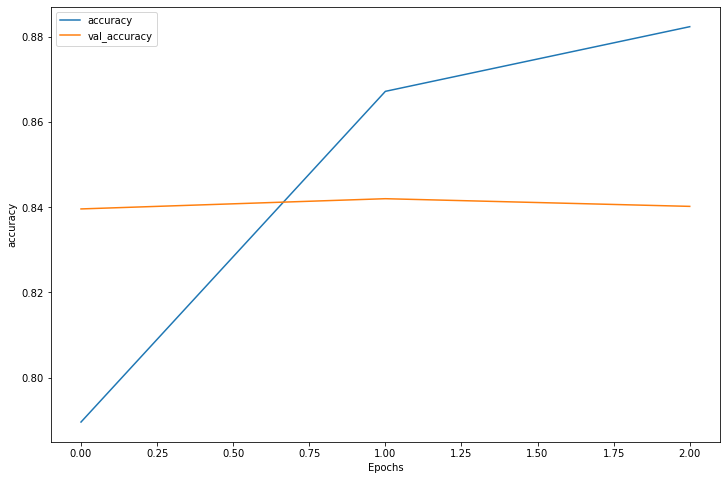

In [89]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "accuracy")

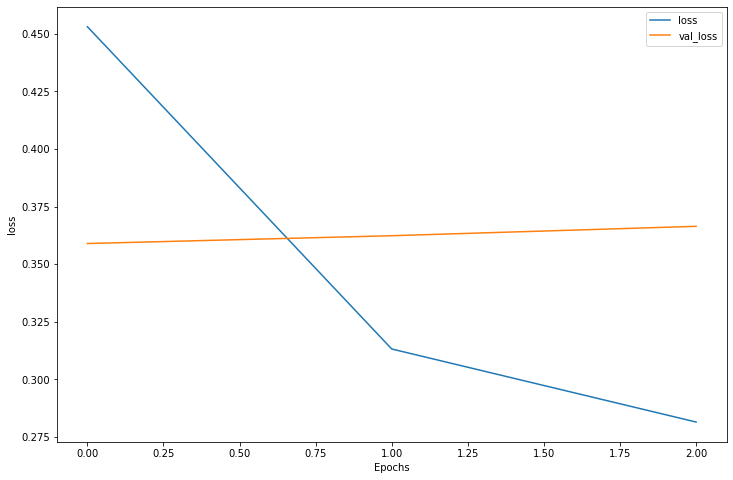

In [90]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "loss")

In [91]:
model.save('sentiment_model.h5')

In [95]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
len(review_filtered_test)

5000

In [104]:
sentence = review_filtered_test
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
pred = np.round(pred)

In [105]:
pred[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [106]:
print(confusion_matrix(labels_test, pred))
print('\n')
print(classification_report(labels_test, pred))

[[2085  445]
 [ 354 2116]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2530
           1       0.83      0.86      0.84      2470

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [109]:
# Testing singular texts to see if the model works

In [107]:
sentence = ["I really love this movie. It was so good."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

1.0


In [108]:
sentence = ["This movie is really bad"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

0.0


In [110]:
sentence = ["This is the single worst piece of a movie I have ever seen. I am so disguisted with the quality of the film as it as absolutely no content whatsoever."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

0.0


In [111]:
sentence = ["This is just awesome. This movie made me realize so many things and I absolutely love the way the director plays out the characters. Keep it up!"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

1.0
